## Title :
Pooling Mechanics

## Description :
The aim of this exercise is to understand the tensorflow.keras implementation of: 

1. Max Pooling 
2. Average Pooling

<img src="../fig/fig1.png" style="width: 500px;">

## Instructions :

First, implement Max Pooling by building a model with a single `MaxPooling2D` layer. Print the output of this layer by using `model.predict()` to show the output.

Next, implement Average Pooling by building a model with a single `AvgPooling2D` layer. Print the output of this layer by using `model.predict()` to show the output.


## Hints: 

<a href="https://keras.io/api/layers/pooling_layers/max_pooling2d/" target="_blank">tf.keras.layers.MaxPooling2D()</a>Max pooling operation for 2D spatial data.

<a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/AveragePooling2D" target="_blank">tf.keras.layers.AveragePooling2D()</a>Average pooling operation for spatial data.

<a href="https://numpy.org/doc/stable/reference/generated/numpy.squeeze.html" target="_blank">np.squeeze()</a>Remove single-dimensional entries from the shape of an array.

<a href="https://numpy.org/doc/stable/reference/generated/numpy.expand_dims.html" target="_blank">np.expand_dims()</a>Add single-dimensional entries from the shape of an array.

Example: np.expand_dims (img, axis=(0,3))

In [1]:
# Import necessary libraries 
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPool2D,AveragePooling2D,Input
from helper import plot_pool


2023-07-18 22:11:46.467393: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
data = [[128, 128, 128],
        [128, 128, 128],
        [128, 128, 128],
        [128, 128, 128],
        [128, 128, 128],
        [128, 128, 128],
        [128, 128, 128],
        [231, 239, 239],
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        [128, 128, 128],
        [128, 128, 128],
        [143, 143, 149],
        [160, 160, 172],
        [156, 156, 168],
        [254, 254, 254],
        [254, 254, 254],
        [128, 128, 128],
        [128, 128, 128],
        [128, 128, 128],
        [128, 128, 128],
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        [128, 128, 128],
        [128, 128, 128],
        [128, 128, 128],
        [182, 188, 198],
        [128, 128, 128],
        [254, 254, 254],
        [254, 254, 254],
        [128, 128, 128],
        [128, 128, 128],
        [201, 213, 216],
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        [128, 128, 128],
        [128, 128, 128],
        [128, 128, 128],
        [194, 204, 210],
        [213, 228, 228],
        [166, 166, 181],
        [128, 128, 128],
        [128, 128, 128]]
matrix = np.array(data)

# Reshape the matrix to 7x7x3
matrix = matrix.reshape(7, 7, 3)

np.save('3.npy', matrix)

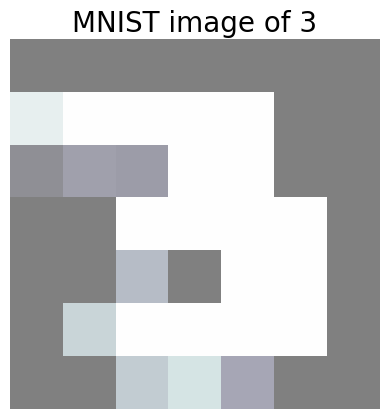

In [17]:
# Load the 7x7 mnist image 
img = np.load('3.npy')
plt.imshow(img,cmap = 'bone');
plt.axis('off');
plt.title('MNIST image of 3',fontsize=20);

### ⏸ Consider an input of size $(7,7)$ pixels.What will be the dimensions of the output if you use `pool_size=2`, `strides = 1` & `padding='valid'`?


#### A. $(5,5)$
#### B. $(6,6)$
#### C. $(4,4)$
#### D. $(7,7)$

In [ ]:
### edTest(test_chow1) ###
# Submit an answer choice as a string below (eg. if you choose option C, put 'C')
answer1 = 'B'

## Max Pooling

In [19]:
img.shape

(7, 7, 3)

In [24]:
print(np.expand_dims(img,axis=2).shape)
np.expand_dims(img,axis=2)

# from outside to the inside

(7, 7, 1, 3)


array([[[[128, 128, 128]],

        [[128, 128, 128]],

        [[128, 128, 128]],

        [[128, 128, 128]],

        [[128, 128, 128]],

        [[128, 128, 128]],

        [[128, 128, 128]]],


       [[[231, 239, 239]],

        [[254, 254, 254]],

        [[254, 254, 254]],

        [[254, 254, 254]],

        [[254, 254, 254]],

        [[128, 128, 128]],

        [[128, 128, 128]]],


       [[[143, 143, 149]],

        [[160, 160, 172]],

        [[156, 156, 168]],

        [[254, 254, 254]],

        [[254, 254, 254]],

        [[128, 128, 128]],

        [[128, 128, 128]]],


       [[[128, 128, 128]],

        [[128, 128, 128]],

        [[254, 254, 254]],

        [[254, 254, 254]],

        [[254, 254, 254]],

        [[254, 254, 254]],

        [[128, 128, 128]]],


       [[[128, 128, 128]],

        [[128, 128, 128]],

        [[182, 188, 198]],

        [[128, 128, 128]],

        [[254, 254, 254]],

        [[254, 254, 254]],

        [[128, 128, 128]]],


       [[[

In [27]:
# Specify the variables for pooling 
pool_size = (2,2)
strides = 1

# Padding parameter can be 'valid', 'same', etc.
padding = 'valid'

# Build the model to perform maxpooling operation 
model_1 = Sequential(name = 'MaxPool')
model_1.add(Input(shape = (7,7,3)))
model_1.add(MaxPool2D(pool_size = pool_size,strides=strides, padding=padding))

# Take a look at the summary to see the output shape
model_1.summary()

Model: "MaxPool"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 3)          0         
 2D)                                                             
                                                                 
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [34]:
model_1.predict(np.expand_dims(img, axis = 0))

1/1 [==============================] - 0s 12ms/step


array([[[[254., 254., 254.],
         [254., 254., 254.],
         [254., 254., 254.],
         [254., 254., 254.],
         [254., 254., 254.],
         [128., 128., 128.]],

        [[254., 254., 254.],
         [254., 254., 254.],
         [254., 254., 254.],
         [254., 254., 254.],
         [254., 254., 254.],
         [128., 128., 128.]],

        [[160., 160., 172.],
         [254., 254., 254.],
         [254., 254., 254.],
         [254., 254., 254.],
         [254., 254., 254.],
         [254., 254., 254.]],

        [[128., 128., 128.],
         [254., 254., 254.],
         [254., 254., 254.],
         [254., 254., 254.],
         [254., 254., 254.],
         [254., 254., 254.]],

        [[201., 213., 216.],
         [254., 254., 254.],
         [254., 254., 254.],
         [254., 254., 254.],
         [254., 254., 254.],
         [254., 254., 254.]],

        [[201., 213., 216.],
         [254., 254., 254.],
         [254., 254., 254.],
         [254., 254., 254.],
    

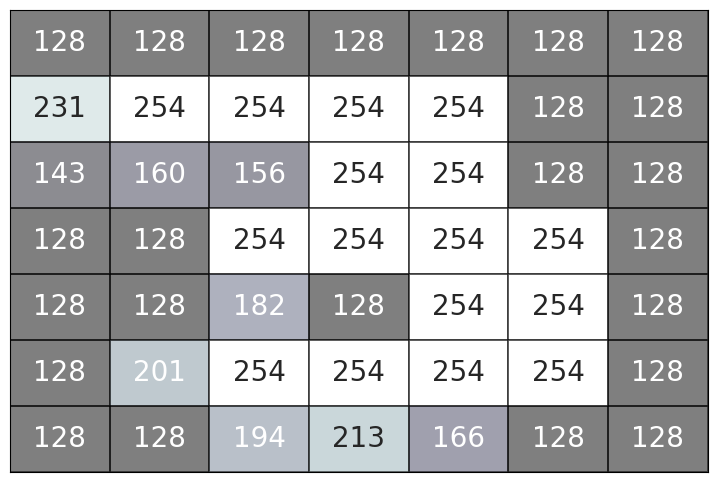

In [64]:
import seaborn as sns
plot_colour = plt.cm.bone
fig, ax = plt.subplots(1,1, figsize = (9,6))
sns.heatmap(img[:,:,0], annot=True, fmt="d", linewidths=.05,
                    cmap=plot_colour, cbar=False, alpha = 0.5,ax = ax,
                    annot_kws={"fontsize": 20}, linecolor='k')
# fmt="d": specifies the format of the annotations. the "d" format, which stands for "decimal."
# annot_kws Keyword arguments for matplotlib.axes.Axes.text() when annot is True.

ax.spines['right'].set_visible(True)
ax.spines['top'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

1/1 [==============================] - 0s 12ms/step


findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
f

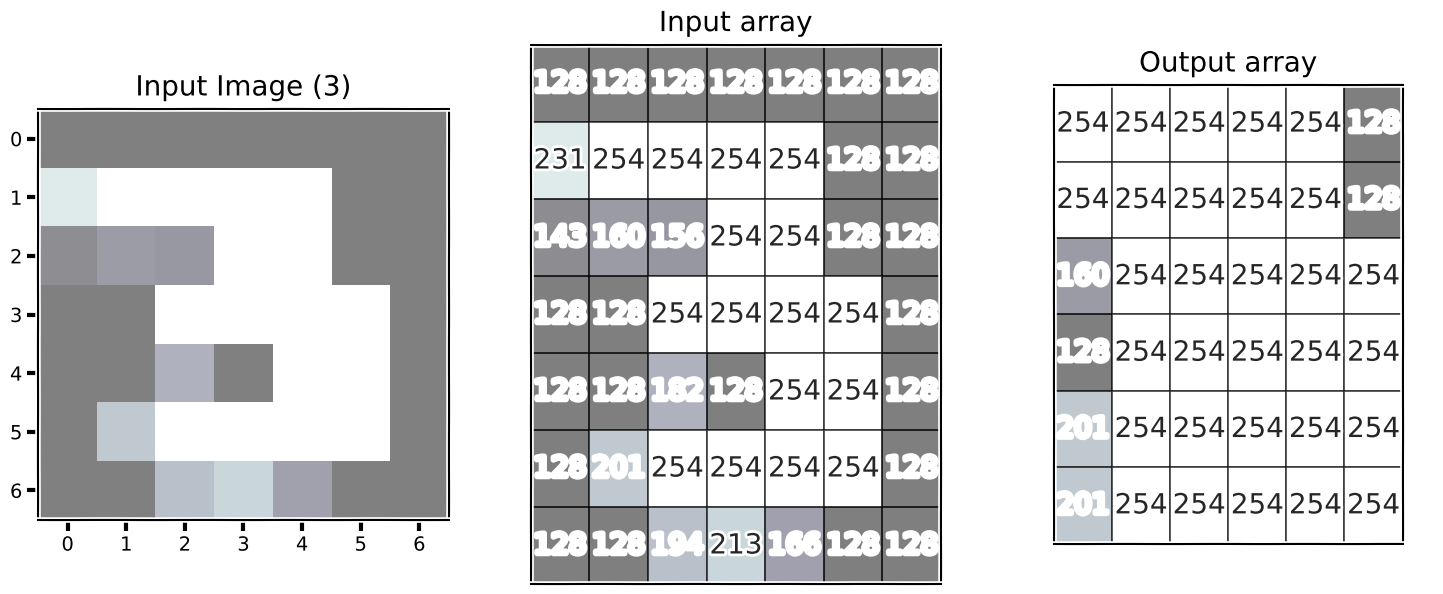

In [53]:
# Output the image using the model above 
# Remember to use np.expand_dims to change input image dimensions
# to 4-d tensor because model_1.predict will not work on 2-d tensor
pooled_img = model_1.predict(np.expand_dims(img, axis = 0))
# 4-d: (Batch Size, height, width, channels)


# Use the helper code to visualize the pooling operation 
# np.squeeze() is used to bring the image to 2-dimension 
# to use matplotlib to plot it
pooled_img = pooled_img.squeeze()

# plot_pool is a function that will return 3 plots to help visualize
# the pooling operation
plot_pool(img[:,:,0],pooled_img[:,:,0])

### ⏸ What if your stride is larger than your pool size?


#### A. Operation is invalid
#### B. Operation is valid but you will have an output larger than the input
#### C. Operation is valid but you will miss out on some pixels
#### D. Operation is valid but you will have an output as the same size as the input

In [ ]:
### edTest(test_chow2) ###
# Submit an answer choice as a string below 
# (eg. if you choose option C, put 'C')
answer2 = 'C'

## Average Pooling

In [66]:
# Specify the variables for pooling 
pool_size = 3
strides = 3

# Padding parameter can be 'valid', 'same', etc.
padding = 'valid'

# Build the model to perform average pooling operation 
model_2 = Sequential(name = 'AveragePool')
model_2.add(Input(shape = (7,7,3)))
model_2.add(AveragePooling2D(pool_size = pool_size,strides=strides, padding=padding))
model_2.summary()

Model: "AveragePool"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 average_pooling2d_1 (Averag  (None, 2, 2, 3)          0         
 ePooling2D)                                                     
                                                                 
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 21ms/step


findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
f

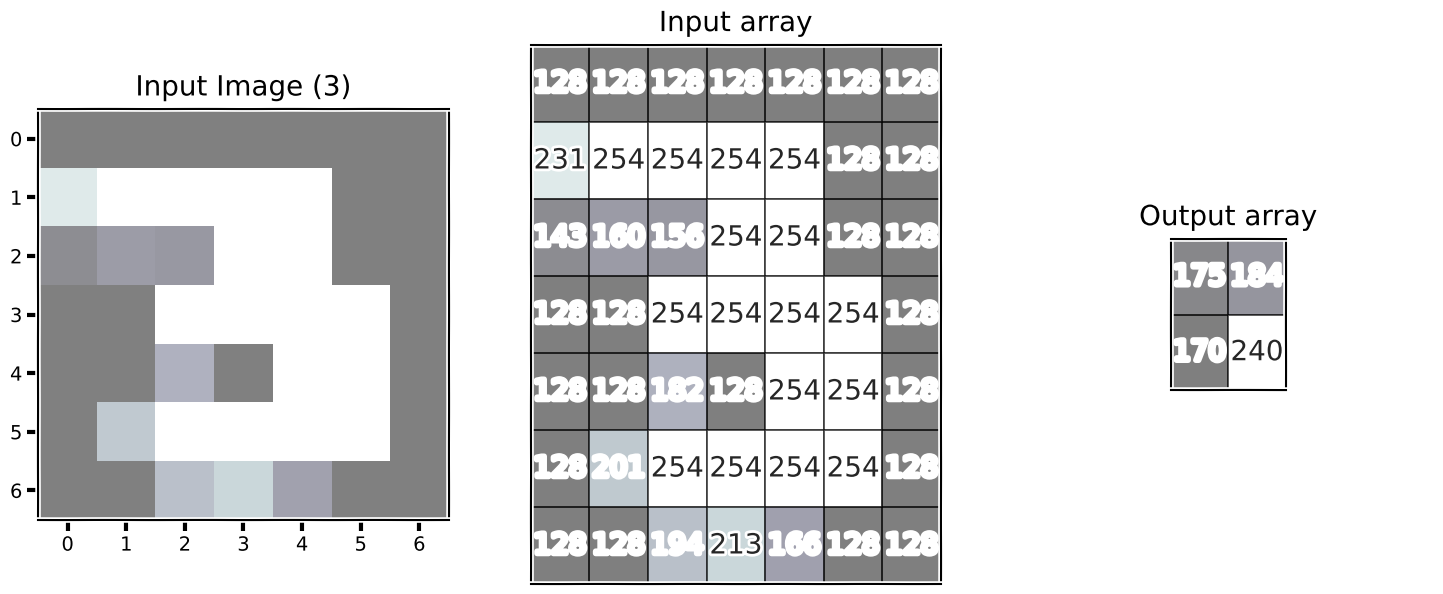

In [67]:
# Output the image using the model above 
# Remember to use np.expand_dims to change input image dimensions
# to 4-d tensor because model_1.predict will not work on 2-d tensor
pooled_img = model_2.predict(np.expand_dims(img, axis = 0))


# Use the helper code to visualize the pooling operation 
pooled_img = pooled_img.squeeze()
plot_pool(img[:,:,0],pooled_img[:,:,0])

### ⏸ Which among the following 2 pooling operation activates the input image more? Answer based on your results above.
#### A.  Average pooling
#### B.  Max pooling

In [1]:
### edTest(test_chow3) ###
# Submit an answer choice as a string below 
# (eg. if you choose option A, put 'a')
answer3 = 'A'

    Max pooling is often preferred when the precise location of features is crucial, and you want to maintain the most distinctive features in the down-sampled feature maps. This can be especially useful for tasks like object detection, where the exact position of objects matters.

    Average pooling, on the other hand, can be beneficial when you want to retain more generalized information and reduce the sensitivity to small local changes. It can be useful for tasks like image classification, where the overall presence of features is more important than their exact locations.